In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import files
uploaded = files.upload()

In [3]:
from google.colab import files
uploaded = files.upload()

In [4]:
train_df =pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.00,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.50,1.50,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.25,0.5,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.75,1.75,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [0]:
train_labels = []
train_values = []

for i in train_df.columns:
    if train_df[i].isnull().sum() > 0:
        train_labels.append(i)
        train_values.append(train_df[i].isnull().sum())
  
  

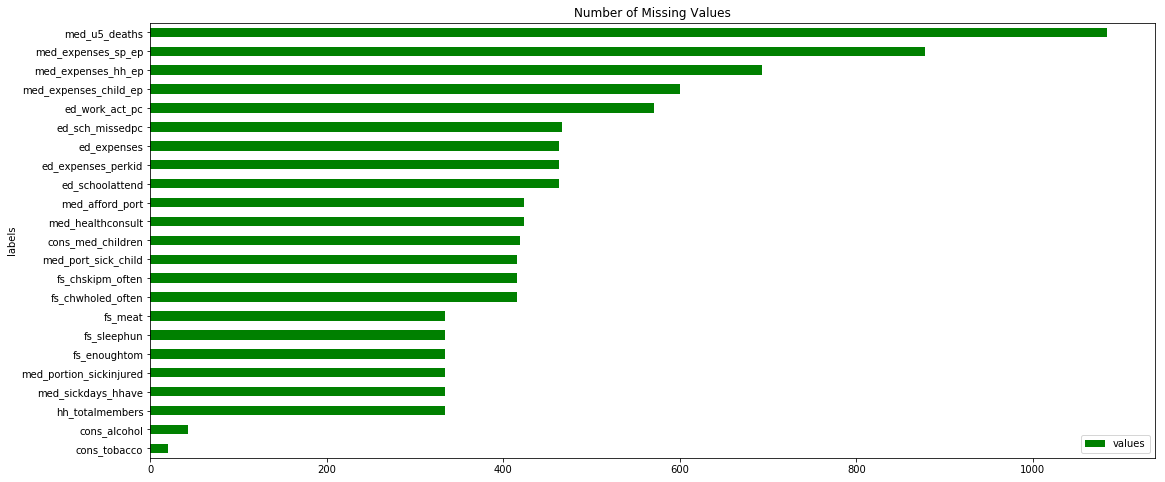

In [6]:
#list
data1 = list(zip(train_labels, train_values))
#dataframe
missdf = pd.DataFrame(data1, columns = ['labels','values'])
#rearrange values
desc1 = missdf.sort_values(by='values', ascending = True)
desc1.plot(x='labels', y='values',kind='barh', color='g', figsize=(18,8),title="Number of Missing Values", sort_columns=False)
plt.show()

In [7]:
len(train_labels)

23

In [0]:
train_df.drop(train_labels,inplace= True,axis=1)
test_df.drop(train_labels,inplace=True,axis=1)
train_df.drop(['survey_date'],inplace= True,axis=1)
test_df.drop(['survey_date'],inplace=True,axis=1)

In [0]:
def encode(age):
    if age == '.d':
        return 0
    else:
        return age
test_df['age'] = test_df.age.apply(encode)
test_df['age'] = test_df['age'].astype('float')

In [0]:
test_df['age']= test_df['age'].fillna(0)

In [11]:
#split into independent and dependent variables
X = train_df.drop('depressed', axis = 1)
Y = train_df['depressed']
print(X.shape)
print(Y.shape)

(1143, 50)
(1143,)


In [12]:
#split into independent and dependent variables
X1= test_df.drop('depressed', axis = 1)
Y1 = test_df['depressed']
print(X1.shape)
print(Y1.shape)

(286, 50)
(286,)


In [13]:
#feature selection
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
rfe=RFE(model)
fit = rfe.fit(X,Y)
print('Number of features: %d' %fit.n_features_)
print('Features: %s' %fit.support_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Number of features: 25
Features: [False False False False  True  True False  True  True False False False
 False False  True  True  True  True False False False  True False  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True False False False False False  True False False False False
  True  True]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [14]:
#print out the features selected
for i,j in zip(fit.support_,X.columns):
    if i == True:
        print(j)
    else:
        pass

married
children
edu
hh_children
asset_land_owned_total
asset_niceroof
cons_allfood
cons_ownfood
cons_other
ent_ownfarm
ent_business
ent_nonagbusiness
ent_employees
ent_nonag_flowcost
ent_farmexpenses
ent_animalstockrev
ent_total_cost
fs_adskipm_often
fs_adwholed_often
med_vacc_newborns
med_child_check
labor_primary
received_mpesa
early_survey
day_of_week


In [0]:
train_data = pd.DataFrame(train_df,columns = ['femaleres','married','children','edu',
                                              'hh_children','asset_land_owned_total','asset_niceroof','cons_ownfood'
                                              ,'cons_other','ent_ownfarm','ent_business','ent_nonagbusiness',
                                              'ent_employees','ent_nonag_flowcost','ent_farmexpenses','ent_animalstockrev',
                                              'ent_total_cost','fs_adskipm_often','fs_adwholed_often','med_vacc_newborns',
                                              'med_child_check',
                                              'labor_primary','received_mpesa','early_survey','day_of_week'])
test_data = pd.DataFrame(test_df,columns = ['femaleres','married','children','edu',
                                              'hh_children','asset_land_owned_total','asset_niceroof','cons_ownfood'
                                              ,'cons_other','ent_ownfarm','ent_business','ent_nonagbusiness',
                                              'ent_employees','ent_nonag_flowcost','ent_farmexpenses','ent_animalstockrev',
                                              'ent_total_cost','fs_adskipm_often','fs_adwholed_often','med_vacc_newborns',
                                              'med_child_check',
                                              'labor_primary','received_mpesa','early_survey','day_of_week'])
                          
                          

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scale = MinMaxScaler()
std_scale = StandardScaler()
x_train_std = std_scale.fit_transform(train_data)
x_test_std = std_scale.fit_transform(test_data)

x_train_scale = scale.fit_transform(x_train_std)
x_test_scale = scale.fit_transform(x_test_std)

In [0]:
model = GradientBoostingClassifier(n_estimators=90, max_depth=3, random_state=8) 
model.fit(x_train_scale,Y)
gb_pred = model.predict(x_test_scale)

model= xgb.XGBClassifier(seed=3)
model.fit(x_train_scale,Y)
p_pred = model.predict_proba(x_test_scale)

xgb_pred = []
for pp in p_pred:
    if 0.5 < pp[1] < 0.6:
        xgb_pred.append(1)
    else:
        xgb_pred.append(0)

        
model = RandomForestClassifier(random_state=3, n_estimators=20)
model.fit(x_train_scale,Y)
rf_pred = model.predict(x_test_scale)

blend = []
for p in range(len(gb_pred)):
    if (gb_pred[p] > 0) | (xgb_pred[p] > 0) | (rf_pred[p] > 0):
        blend.append(1)
    else:
        blend.append(0)


In [22]:
from google.colab import files
uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [25]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,surveyid,depressed
0,901,0.0
1,498,0.0
2,710,0.0
3,433,1.0
4,44,NaN


In [0]:
my_submission = {'surveyid': sample_submission['surveyid'], 'depressed': blend}

In [0]:
first_submission = pd.DataFrame(my_submission)

In [28]:
first_submission.head()

,surveyid,depressed
0,901,0
1,498,0
2,710,0
3,433,0
4,44,0


In [0]:
from google.colab import files
first_submission.to_csv('first.csv') 
files.download('first.csv')